In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
import data_preparation as dp

In [3]:
# Import the cleaned data
df = dp.full_clean("../data/Aviation_Data.csv","../data/Aviation_Data_Cleaned.csv")
df

/Users/willbennett/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3337: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,event_id,event_date,location,airport_code,airport_name,injury_severity,aircraft_damage,make,model,number_of_engines,...,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,passenger_count,city,state
7,20020909X01562,1982-01-01,"PULLMAN, WA",Unknown,BLACKBURN AG STRIP,Non-Fatal,Substantial,Cessna,140,1.0,...,Personal,0.0,0.0,0.0,2.0,Visual Meteorological Conditions,Takeoff,2.0,Pullman,WA
8,20020909X01561,1982-01-01,"EAST HANOVER, NJ",N58,HANOVER,Non-Fatal,Substantial,Cessna,401B,2.0,...,Business,0.0,0.0,0.0,2.0,Instrument Meteorological Conditions,Landing,2.0,East hanover,NJ
9,20020909X01560,1982-01-01,"JACKSONVILLE, FL",JAX,JACKSONVILLE INTL,Non-Fatal,Substantial,North American,NAVION L-17B,1.0,...,Personal,0.0,0.0,3.0,0.0,Instrument Meteorological Conditions,Cruise,3.0,Jacksonville,FL
10,20020909X01559,1982-01-01,"HOBBS, NM",Unknown,Unknown,Non-Fatal,Substantial,Piper,PA-28-161,1.0,...,Personal,0.0,0.0,0.0,1.0,Visual Meteorological Conditions,Approach,1.0,Hobbs,NM
11,20020909X01558,1982-01-01,"TUSKEGEE, AL",Unknown,TUSKEGEE,Non-Fatal,Substantial,Beech,V35B,1.0,...,Personal,0.0,0.0,0.0,1.0,Visual Meteorological Conditions,Landing,1.0,Tuskegee,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90340,20221221106483,2022-12-21,"Auburn Hills, MI",Unknown,Unknown,Minor,Unknown,Cessna,172F,1.0,...,Personal,0.0,1.0,0.0,0.0,Unknown Meteorological Conditions,Unknown,1.0,Auburn hills,MI
90341,20221222106486,2022-12-21,"Reserve, LA",Unknown,Unknown,Minor,Unknown,Grumman American Avn. Corp.,AA-5B,1.0,...,Instructional,0.0,1.0,0.0,1.0,Unknown Meteorological Conditions,Unknown,2.0,Reserve,LA
90343,20221227106491,2022-12-26,"Annapolis, MD",Unknown,Unknown,Minor,Unknown,Piper,PA-28-151,1.0,...,Personal,0.0,1.0,0.0,0.0,Unknown Meteorological Conditions,Unknown,1.0,Annapolis,MD
90345,20221227106497,2022-12-26,"Payson, AZ",PAN,PAYSON,Non-Fatal,Substantial,American Champion Aircraft,8GCBC,1.0,...,Personal,0.0,0.0,0.0,1.0,Visual Meteorological Conditions,Unknown,1.0,Payson,AZ


**Observations**
- The data is mostly clean with nice column names
- Key columns are make and model
- Each column represents a particular Accident

In [4]:
# Let's check out the information about this dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70256 entries, 7 to 90347
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   event_id                70256 non-null  object        
 1   event_date              70256 non-null  datetime64[ns]
 2   location                70256 non-null  object        
 3   airport_code            70256 non-null  object        
 4   airport_name            70256 non-null  object        
 5   injury_severity         70256 non-null  object        
 6   aircraft_damage         70256 non-null  object        
 7   make                    70256 non-null  object        
 8   model                   70256 non-null  object        
 9   number_of_engines       70256 non-null  float64       
 10  engine_type             70256 non-null  object        
 11  purpose_of_flight       70256 non-null  object        
 12  total_fatal_injuries    70256 non-null  float6

**Observations**
- We have a single datetime column
- We have a significant number of float columns
- We have a significant number of object columns
- We have mostly non-nulls

In [5]:
# Check for nulls
df.isna().sum()

event_id                  0
event_date                0
location                  0
airport_code              0
airport_name              0
injury_severity           0
aircraft_damage           0
make                      0
model                     0
number_of_engines         0
engine_type               0
purpose_of_flight         0
total_fatal_injuries      0
total_serious_injuries    0
total_minor_injuries      0
total_uninjured           0
weather_condition         0
broad_phase_of_flight     0
passenger_count           0
city                      0
state                     0
dtype: int64

In [6]:
# Let's investigate the numerical side
df.describe()

,number_of_engines,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,passenger_count
count,70256.000000,70256.000000,70256.000000,70256.000000,70256.000000,70256.000000
mean,1.113912,0.373776,0.223127,0.294295,2.757814,3.649012
std,0.406154,2.416796,1.073886,1.245847,16.477869,17.035006
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000
max,8.000000,265.000000,137.000000,125.000000,699.000000,699.000000


**Obesrvations**
- `number_of_engines` are mostly 1 (25 -> 75%)
- `total_fatal_injuries` are mostly 0 (25 -> 75%)
- `total_serious_injuries` are mostly 0 (25 -> 75%)
- `total_minor_injuries` are mostly 0 (25 -> 75%)
- `total_uninjured` is fairly left skewed
- `passenger_count` is fairly left skewed
- `fatality_rate` are mostly 0 (25 -> 75%)

In [7]:
# Let's investigate the non-numerical data
df.describe(include=object)

,event_id,location,airport_code,airport_name,injury_severity,aircraft_damage,make,model,engine_type,purpose_of_flight,weather_condition,broad_phase_of_flight,city,state
count,70256,70256,70256,70256,70256,70256,70256,70256,70256,70256,70256,70256,70256,70256
unique,70256,21244,9021,21548,5,4,1683,7129,12,26,3,12,12126,61
top,20001211X14213,"ANCHORAGE, AK",Unknown,Unknown,Non-Fatal,Substantial,Cessna,152,Reciprocating,Personal,Visual Meteorological Conditions,Unknown,Anchorage,CA
freq,1,385,28600,26417,57508,54697,25159,2254,60479,40256,63971,17946,482,7517


**Observations**
- `event_id` is unique for every row
- There are a significant number of categorical data with few unique counts
 - `injury_severity`
 - `aircraft_damage`
 - `engine_type`
 - `purpose_of_flight`
 - `weather_condition`
 - `broad_phase_of_flight`
 - `state`
- There are a few columns with many different values:
 - `location`
 - `airport_code`
 - `airport_name`
 - `make`
 - `model`
 - `city`

## Key Column quick dive

In [8]:
# Let's dive into our key columns
df.groupby(['make','model'])['event_id'].count().sort_values(ascending=False)[:10]

make    model    
Cessna  152          2254
        172          1606
        172N         1106
Piper   PA-28-140     891
Cessna  150           774
        172M          751
        172P          658
        180           612
        182           582
Piper   PA-18         574
Name: event_id, dtype: int64

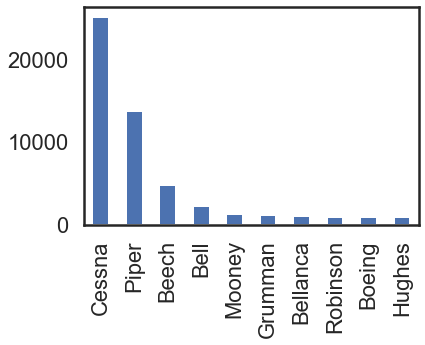

In [36]:
# Plot the top 10 makes
df['make'].value_counts()[:10].plot.bar();

**Observations**
- The top 4 makes account for the majority of the accidents
- This may be simply because they are the most popular small aircraft

Need to clean case redundancies

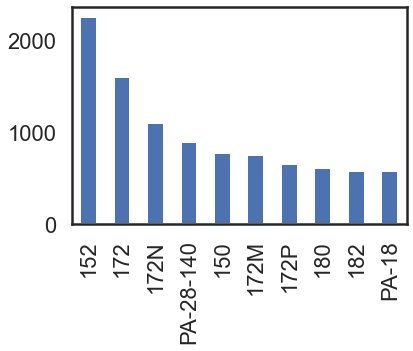

In [37]:
# Plot the top 10 models
df['model'].value_counts()[:10].plot.bar();

**Observations**
- Incidents seem to be fairly spread out over the top 10 models
- 152 & 172 do seem to dominate

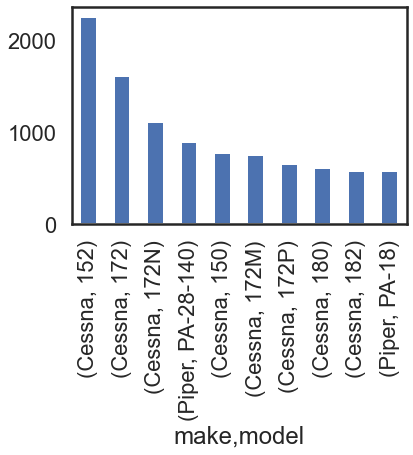

In [38]:
# Let's combine make and model
df[['make','model']].value_counts()[:10].plot.bar();

**Observations**
- Cessna & Piper make up all the top 10

## Categorical Data Quick Dive

In [12]:
# Let's investigate a column with few unique values
df['aircraft_damage'].value_counts()

Substantial    54697
Destroyed      14039
Unknown         1030
Minor            490
Name: aircraft_damage, dtype: int64

In [13]:
# Check out the end result for injuries
df['injury_severity'].value_counts().head()

Non-Fatal      57508
Fatal          12428
Minor            178
Serious          128
Unavailable       14
Name: injury_severity, dtype: int64

In [14]:
# Create a column call fatality rate to figure out the deadliness of the accident
df['fatality_rate'] = df['total_fatal_injuries']/df['passenger_count']

In [15]:
df['fatality_rate'].head()

7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
Name: fatality_rate, dtype: float64

## Creating Filters
- top_makes_filter: filter of top 4 makes
- top_models_filter: filter of top 20 models

In [16]:
top_makes_list = df['make'].value_counts().nlargest(4).index.tolist()
top_makes_list

['Cessna', 'Piper', 'Beech', 'Bell']

In [17]:
top_makes_filter = df['make'].isin(top_makes_list)

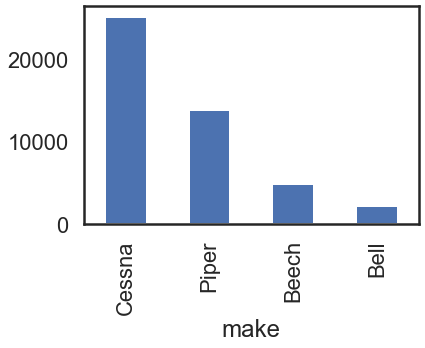

In [39]:
df[top_makes_filter].groupby('make')['event_id'].count().sort_values(ascending=False).plot.bar();

In [19]:
top_models_list = df['model'].value_counts().nlargest(20).index.tolist()
top_models_list

['152',
 '172',
 '172N',
 'PA-28-140',
 '150',
 '172M',
 '172P',
 '180',
 '182',
 'PA-18',
 'PA-18-150',
 '150M',
 'PA-28-180',
 'PA-28-161',
 'PA-28-181',
 'G-164A',
 '206B',
 'PA-38-112',
 '150L',
 'A36']

In [20]:
top_models_filter = df['model'].isin(top_models_list)

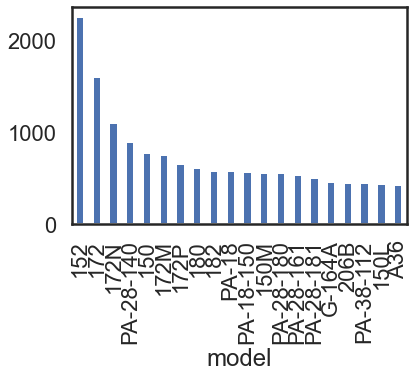

In [40]:
df[top_models_filter].groupby('model')['event_id'].count().sort_values(ascending=False).plot.bar();

In [22]:
df[top_makes_filter].groupby('make')['fatality_rate'].mean().sort_values(ascending=False)

make
Beech     0.246068
Piper     0.170915
Cessna    0.128550
Bell      0.126445
Name: fatality_rate, dtype: float64

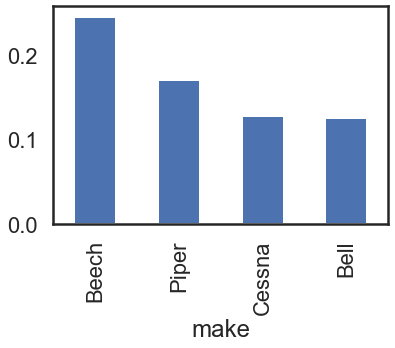

In [41]:
# Check out fatalit rate for top makes
df[top_makes_filter].groupby('make')['fatality_rate'].mean().sort_values(ascending=False).plot.bar();

In [24]:
# Check to see if there are any obvious correlations
df.corr()

,number_of_engines,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,passenger_count,fatality_rate
number_of_engines,1.000000,0.104401,0.052812,0.089333,0.294820,0.309852,0.085504
total_fatal_injuries,0.104401,1.000000,0.128008,0.079754,-0.019361,0.137047,0.334348
total_serious_injuries,0.052812,0.128008,1.000000,0.335773,0.069370,0.172859,-0.052139
total_minor_injuries,0.089333,0.079754,0.335773,1.000000,0.174604,0.274510,-0.084885
total_uninjured,0.294820,-0.019361,0.069370,0.174604,1.000000,0.981690,-0.070466
passenger_count,0.309852,0.137047,0.172859,0.274510,0.981690,1.000000,-0.030221
fatality_rate,0.085504,0.334348,-0.052139,-0.084885,-0.070466,-0.030221,1.000000


**Observations**
- There's no strong correlation with the number of fatal_injuries

## Investigating Fatality Rates

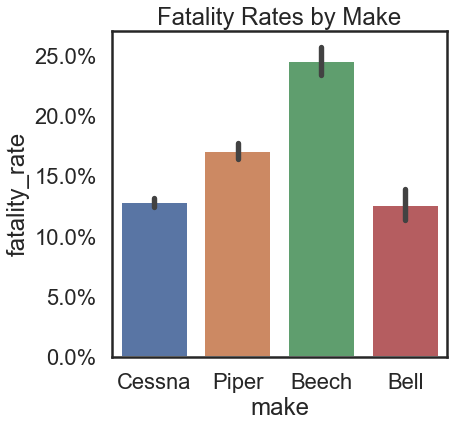

In [42]:
# Separate out the plot by make
fig, ax = plt.subplots(figsize=(6, 6))
sns.barplot(data=df[top_makes_filter], 
            x='make', 
            y='fatality_rate',
            ax=ax,
           )
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=None))
ax.set_title('Fatality Rates by Make');

**Observations**
- Beech seems to have the highest fatality rate

In [26]:
# Create a new column for year
df['event_year'] = df['event_date'].dt.year

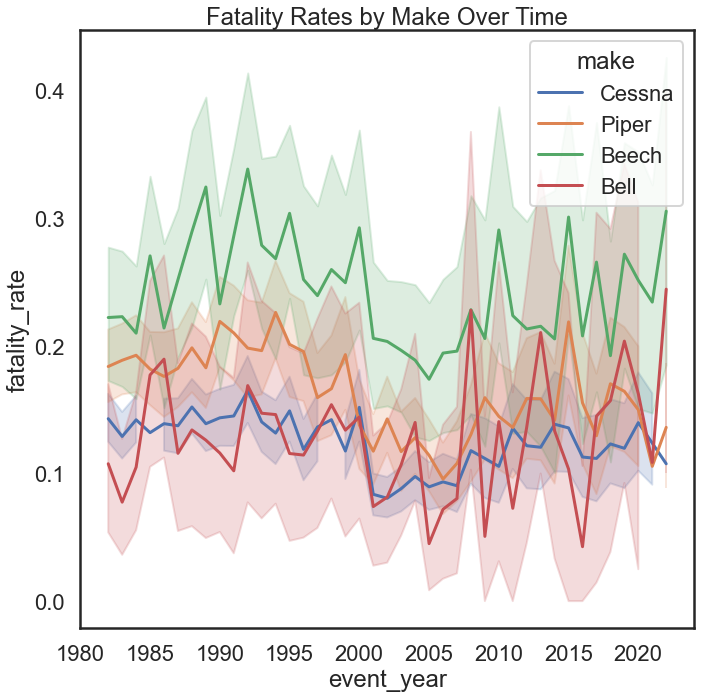

In [43]:
# Let's investigate that over time
fig, ax = plt.subplots(figsize=(11, 11))
sns.lineplot(data=df[top_makes_filter], 
             
             x='event_year', 
             y='fatality_rate',
             ax=ax,
             hue='make',
           )
ax.set_title('Fatality Rates by Make Over Time');

**Observations**
- While this looks messy, it's clear that Beech has maintained a higher fatality rate than the other makes

## Investigating Time

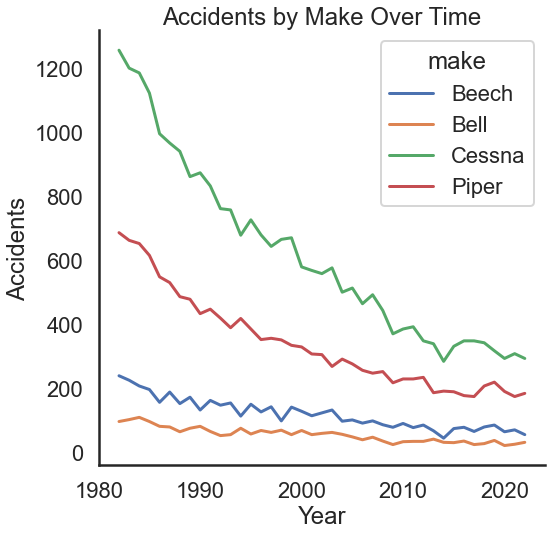

In [44]:
# Accidents over time
data = df[top_makes_filter].groupby(['make', 'event_year']).count().reset_index()

fig, ax = plt.subplots(figsize=(8, 8))
sns.lineplot(data=data, 
             x='event_year', 
             y='event_id',
             ax=ax,
             hue='make',
           )
sns.despine()
ax.set_title('Accidents by Make Over Time')
ax.set_ylabel('Accidents')
ax.set_xlabel('Year')
fig.savefig("../images/accidents_by_make_over_time.png");

### Make & Model Combinations
Let's investigate the top Makes & Models so we can recommend what makes the company may want to avoid

In [45]:
# First let's pull the data
data = df[top_makes_filter & top_models_filter].groupby(['make','model'])['event_id'].count().reset_index()
data

,make,model,event_id
0,Beech,A36,397
1,Bell,206B,451
2,Cessna,150,774
3,Cessna,150L,440
4,Cessna,150M,562
5,Cessna,152,2254
6,Cessna,172,1606
7,Cessna,172M,751
8,Cessna,172N,1106
9,Cessna,172P,658


In [30]:
pivot_table_make_model = pd.pivot_table(df[top_makes_filter & top_models_filter], 
                                        values='passenger_count', 
                                        index='model', 
                                        columns='make', 
                                        aggfunc='count')

In [31]:
pivot_data = pivot_table_make_model.sort_values(by=list(pivot_table_make_model.columns), ascending=False)
pivot_data

make,Beech,Bell,Cessna,Piper
model,,,,
A36,397.0,NaN,NaN,NaN
206B,NaN,451.0,1.0,NaN
152,NaN,NaN,2254.0,NaN
172,NaN,NaN,1606.0,NaN
172N,NaN,NaN,1106.0,NaN
150,NaN,NaN,774.0,NaN
172M,NaN,NaN,751.0,NaN
172P,NaN,NaN,658.0,NaN
180,NaN,NaN,612.0,1.0


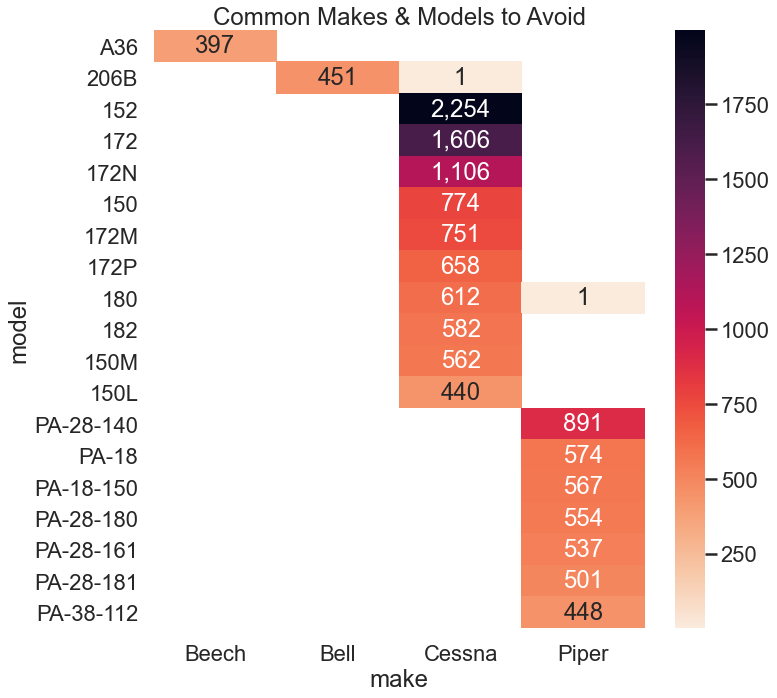

In [46]:
# Draw the heatmap with the mask and correct aspect ratio
fig, ax = plt.subplots(figsize=(11, 11))
sns.set_theme(style="white")
sns.set_context("poster")
cmap = sns.color_palette("rocket_r", as_cmap=True)
hue = data['event_id'].tolist().sort()
sns.heatmap(pivot_data, 
            cmap=cmap, 
            robust=True,
            annot=True,
            fmt=",g",
            ax=ax
           )

ax.set_title('Common Makes & Models to Avoid')
fig.savefig("../images/common_makes_models_avoid.png");


## Number of engines
The number of engines is a key indicator of the type of plane we have. We can use that to identify the types of planes that are most often in accidents

In [33]:
df[top_makes_filter].groupby('number_of_engines').count().reset_index()

,number_of_engines,event_id,event_date,location,airport_code,airport_name,injury_severity,aircraft_damage,make,model,...,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,passenger_count,city,state,fatality_rate,event_year
0,0.0,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
1,1.0,40161,40161,40161,40161,40161,40161,40161,40161,40161,...,40161,40161,40161,40161,40161,40161,40161,40161,40158,40161
2,2.0,5822,5822,5822,5822,5822,5822,5822,5822,5822,...,5822,5822,5822,5822,5822,5822,5822,5822,5820,5822
3,4.0,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,3,4


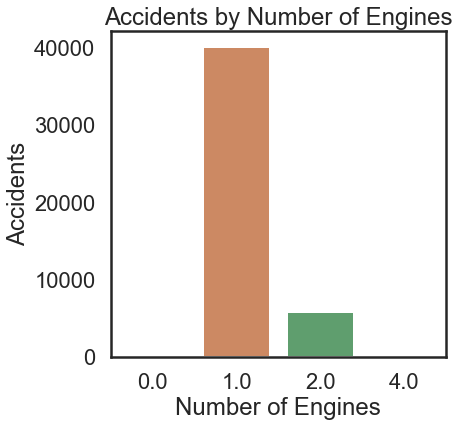

In [47]:
# Separate out the plot by number of engines
fig, ax = plt.subplots(figsize=(6, 6))
data = df[top_makes_filter].groupby('number_of_engines').count().reset_index()
sns.barplot(data=data, 
            x='number_of_engines', 
            y='event_id',
            ax=ax,
           )

ax.set_title('Accidents by Number of Engines')
ax.set_ylabel('Accidents')
ax.set_xlabel('Number of Engines');
#fig.savefig("../images/accidents_by_engine_number.png");

**Observations**
- Most planes are 1 engine, 2 is far behind
- The chart doesn't look very informative since 0 and 4 are non-existent

## Broad Phase of Flight
We will investigate where the accidents happen so we know what to be ready for

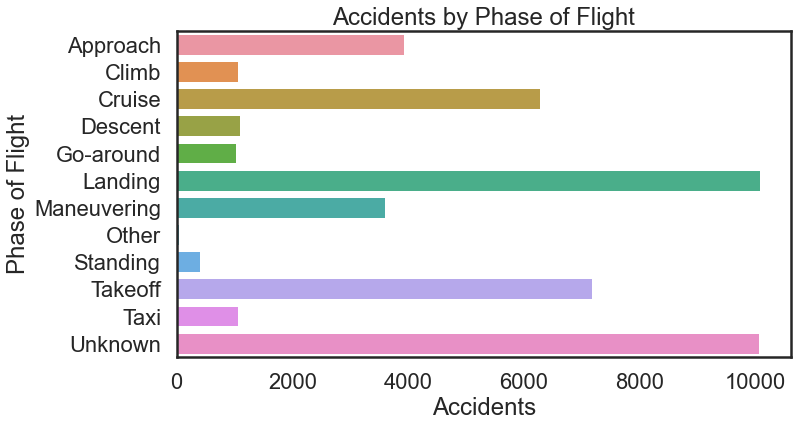

In [48]:
# Separate out the plot by phase of flight
fig, ax = plt.subplots(figsize=(11, 6))
data = df[top_makes_filter].groupby('broad_phase_of_flight').count().reset_index()
sns.barplot(data=data, 
            x='event_id', 
            y='broad_phase_of_flight',
            ax=ax,
           )

ax.set_title('Accidents by Phase of Flight')
ax.set_xlabel('Accidents')
ax.set_ylabel('Phase of Flight');
#fig.savefig("../images/accidents_by_flight_phase.png");

**Observations**
- The majorty happen in landing
- This can be useful to be aware of when accidents happen

# Conclusion
Note: We only have incident data, we don't have the number of flights for airplanes. This makes it challenging to answer questions such as:
- What is the most accident-prone airplane?
- How have accident rates changed over time?
- Which locations have the fewest accidents?

We can also not answer direct questions about airplane popularity that would be useful when entering a new market such as:
- What is the most popular aircraft make and model?
- Where is the most popular location to fly aircraft?

That being said, we are able to make some conclusions including:
- Some makes have a higher rate of fatal accidents
- The most common phase of flight is landing
- Most planes involved in accidents have 1 or 2 wings
- The top 4 makes involved in accidents are Beech, Bell, Cessna, and Piper
- There are certain models that seem to be very involved in accidents and may want to be avioded